# Sobre esse notebook
## Context

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )
Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

Citation
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

----------------------------
## Motivação

Regressão linear é um dos se não mais importantes modelos que temos na estatística, e como sou graduando deste curso, tive a ideia de passar os conhecimentos do papel para um **notebook jupyter**, utilizando apenas a biblioteca **numpy** para realizar as álgebras matriciais.

**Veremos sobre:**
+ Estimação de Parâmetros 
+ ANOVA
+ Testes de Hipóteses
+ R^2 e R^2 Ajustado
+ Intervalo de Confiança
+ ...

# Regressão Linear - Método dos Mínimos Quadrados

$$y=\beta  X +\epsilon$$

$\beta$: Vetor (p x 1) de coeficientes de regressão;
\
$\epsilon$: Vetor (n x 1) Erro Aleatório;
\
$X$: Matriz (n x p) de covariáveis independentes (regressoras);
\
$y$: Vetor (n x 1) variável dependente (resposta)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", context="notebook", palette='pastel')
plt.style.use("dark_background")

In [2]:
df = pd.read_csv(r'..\Entendendo Regressão Linear\Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
### Separando alguns dados para testar a previsão no final

df_aux = df.sample(frac=0.9, replace=False, random_state=21)
teste = df.drop(df_aux.index)

In [5]:
df_aux

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
106,107,329,111,4,4.5,4.5,9.18,1,0.87
9,10,323,108,3,3.5,3.0,8.60,0,0.45
61,62,307,101,3,4.0,3.0,8.20,0,0.47
224,225,305,105,2,3.0,2.0,8.23,0,0.67
37,38,300,105,1,1.0,2.0,7.80,0,0.58
...,...,...,...,...,...,...,...,...,...
28,29,295,93,1,2.0,2.0,7.20,0,0.46
346,347,304,97,2,1.5,2.0,7.64,0,0.47
271,272,299,96,2,1.5,2.0,7.86,0,0.54
338,339,323,108,5,4.0,4.0,8.74,1,0.81


## Análise Exploratória

In [6]:
df_aux.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000
mean,197.136111,316.752778,107.433333,3.072222,3.420833,3.440278,8.59475,0.555556,0.723778
std,117.316043,11.418233,6.050024,1.137022,0.998598,0.900272,0.59634,0.497596,0.142151
min,1.000000,290.000000,93.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.340000
25%,94.750000,308.000000,103.000000,2.000000,2.875000,3.000000,8.19500,0.000000,0.640000
50%,193.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.62000,1.000000,0.730000
75%,299.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.06000,1.000000,0.822500
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.970000


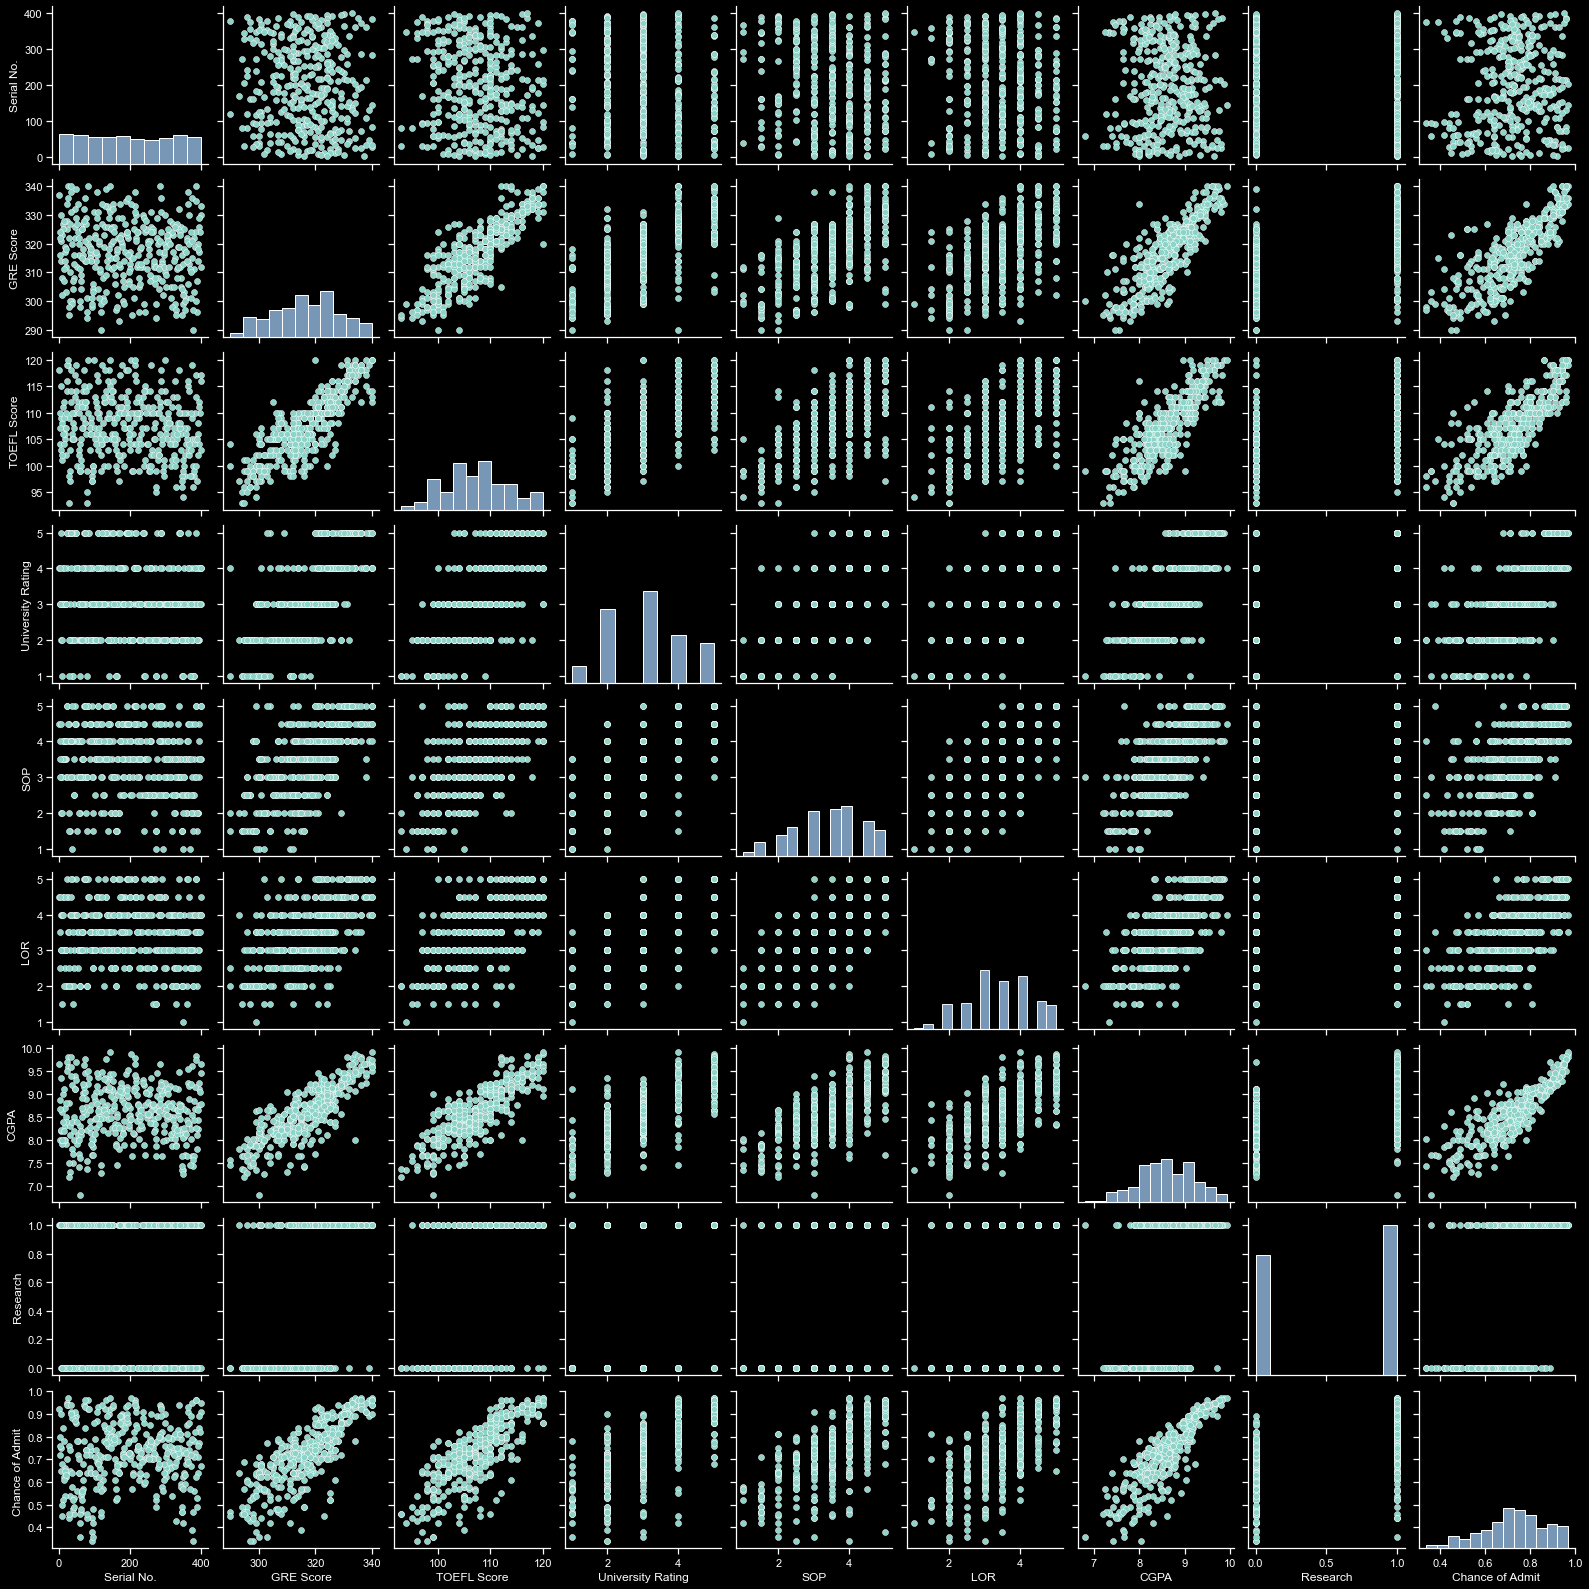

In [7]:
sns.pairplot(df_aux)

In [8]:
var = df_aux['Chance of Admit ']
covs = df_aux.drop(columns='Chance of Admit ')

<AxesSubplot:>

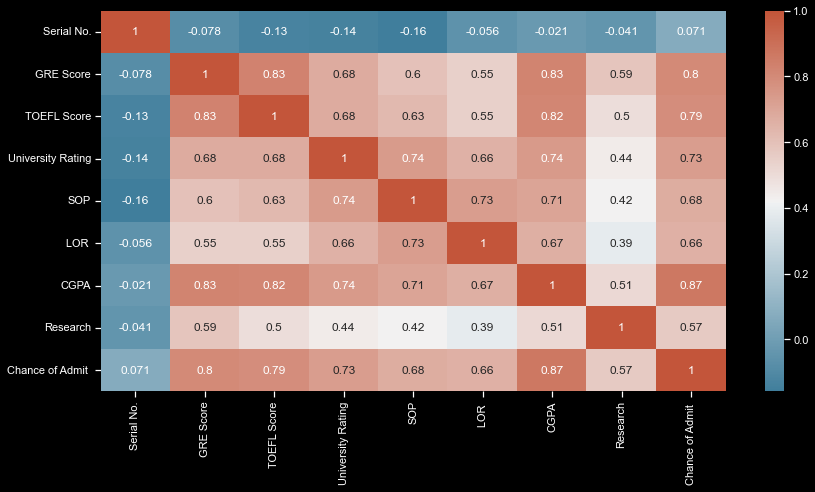

In [9]:
plt.figure(figsize = (14,7))
corr = df_aux.corr(method = 'spearman')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot = True, cmap = cmap)

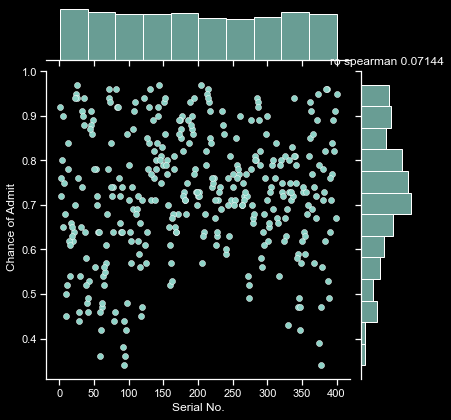

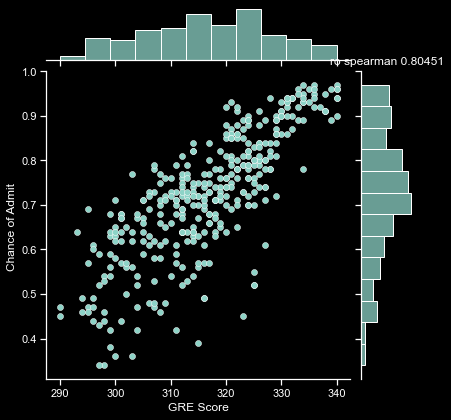

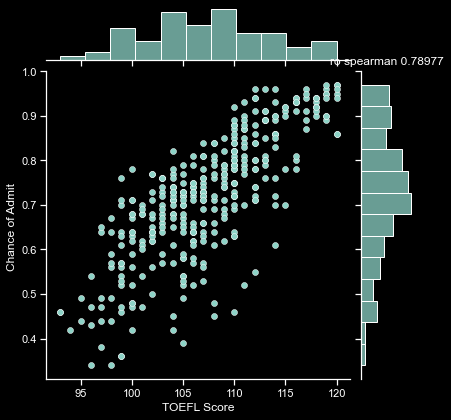

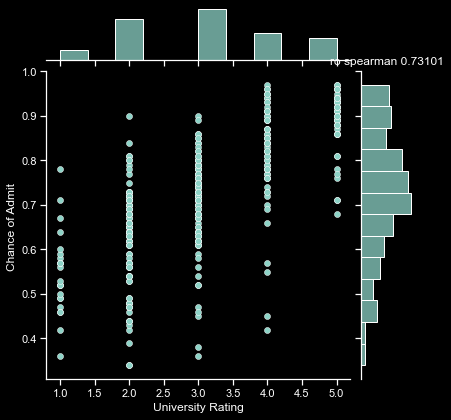

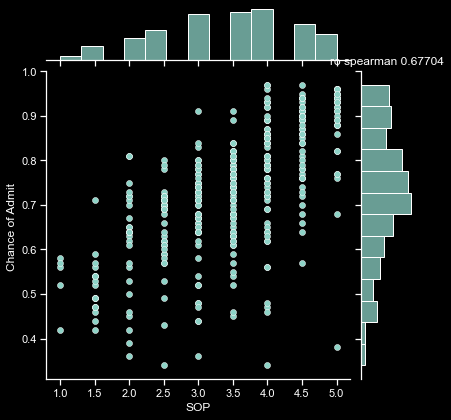

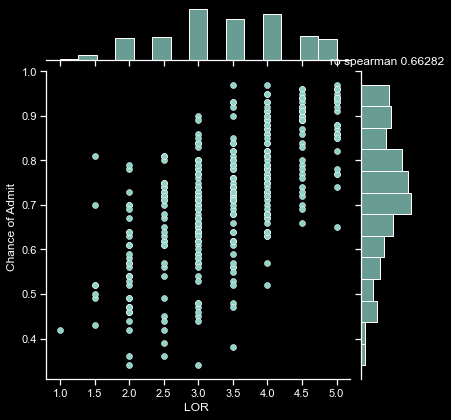

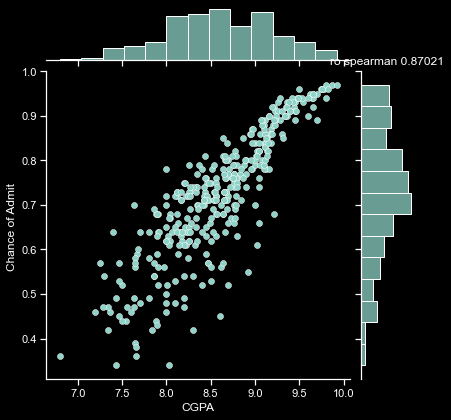

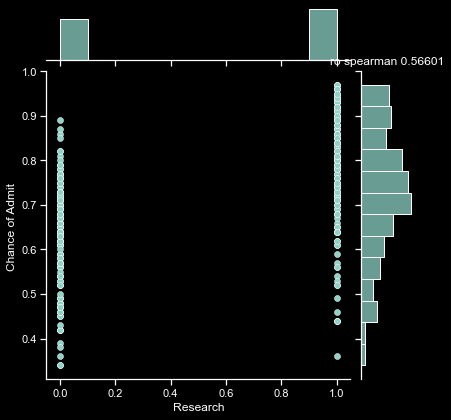

In [10]:
from scipy.stats import stats

for reg in covs.columns:
    sns.jointplot(x=covs[reg], y=var)
    corr_c = round(corr['Chance of Admit '][reg], 5)
    plt.title('ro spearman %.5f' % corr_c, )

Aqui com essa breve análise exploratória conseguimos ver a relação entre as variáveis explicativas e nossa variável resposta.

Todas apresentam correlação positiva com a chance de admissão em uma universidade e todas menos a covariável Serial No. tem esse valor de correlação média para forte.

Isso quer dizer por exemplo que quanto maior sua pontuação TOEFL maior a chance de passar na universidade.

Outro ponto importante para o poder preditivo do nosso modelo é averiguar se nossa variável resposta segue uma distribuição normal.

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

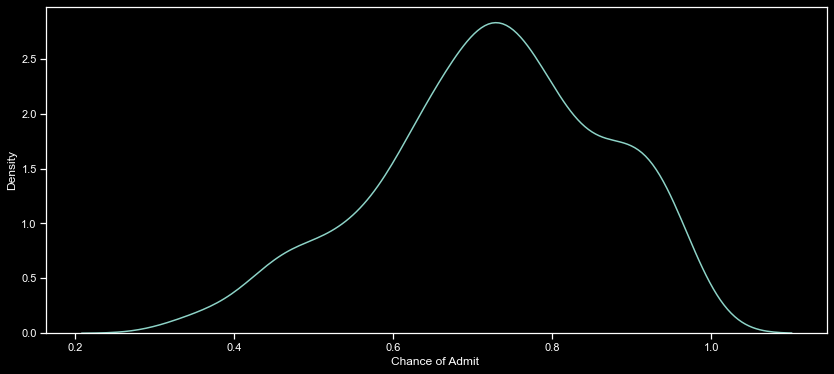

In [11]:
plt.figure(figsize = (14,6))
sns.kdeplot(df_aux['Chance of Admit '])

Olhando para o *shape* dessa distribuição, conseguimos associar com uma distribuição normal. Esta em questão um pouco assimétrica a direita, ou seja, com a média vindo antes da moda e da mediana.

## Estimando nosso modelo - Mínimos Quadrados
$$\hat\beta: \hat\beta = (X^TX)^{-1}X^Ty$$
\
\
$$Modelo Ajustado:\hat y = X\hat\beta = (X^TX)^{-1}X^Ty$$
\
\
$$resíduo: \varepsilon = y - \hat y$$

In [12]:
# Tamanho dos dados
n = len(df_aux)

# Número de covariáveis
k = len(covs.columns)

# Paramêtros estimados: k - n. covariáveis; 1 - Beta0
p = k+1

# Matriz de covariáveis
X = np.column_stack((np.ones(n), covs))

# Variável Resposta
y = np.array(var)

In [13]:
# Vetor com Betas

betas = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

# outra forma de multiplicar matrizes: np.transpose(X) @ X

In [14]:
betas

array([-1.24499029e+00,  1.76338961e-04,  1.49032328e-03,  4.36936473e-03,
        1.13786409e-02, -1.54807363e-03,  2.04131327e-02,  1.02288892e-01,
        2.42811425e-02])

In [15]:
# Estimação do modelo
y_hat = X.dot(betas)

In [16]:
# Residuos
e = y - y_hat

----------------
## Estimação de Parâmetros

### Soma do Quadrado dos Resíduos
$$SQ_{res}=(y - \hat y)^T (y - \hat y)$$
\
$$SQ_{res}=y^Ty-\hat \beta^T X^T y$$

In [17]:
#SQres = np.transpose(y).dot(y) - (np.transpose(betas).dot(np.transpose(X)).dot(y))

In [18]:
SQres = np.transpose(y - y_hat).dot(y-y_hat)

In [19]:
SQres

1.346488882517044

### Soma do Quadrado Totais
$$SQ_{Total}=y^Ty - \frac{(1_n^Ty)^2}{n}$$

In [20]:
# Vetor com 1s de tamanho n
vetor_unitario = np.ones(n)

SQtotal = np.transpose(y).dot(y) - ((np.transpose(vetor_unitario).dot(y))**2)/n

In [21]:
SQtotal

7.2542622222222235

### Soma do Quadrado da Regressão

$$SQ_{reg}= SQ_{Total} - SQ_{res}$$
\
$$SQ_{reg}=\beta^T X^T y- \frac{(1_n^Ty)^2}{n}$$

In [22]:
SQreg = SQtotal - SQres

In [23]:
SQreg

5.907773339705179

### Estimando a Variância (Quadrado Médio do Resíduo)
$$E(SQres) = (n-p)\sigma^2$$
\
$$\sigma^2 = \frac{SQ_{res}}{n-p} = QMres$$

In [24]:
QMres = SQres/(n-p)

In [25]:
QMres

0.003836150662441721

## Calculando a ANOVA

Como fica o calculo da anova? E o teste da significancia da regressao como fica, o que esta testando?

In [26]:
# Graus de Liberdade da Regressão
gl_sqreg = k

# Quadrado Médio da Regressão
QMreg = SQreg/gl_sqreg

# Graus de Liberdade do Resíduo
gl_sqres = n-p

# Quadrado Médio do Resíduo
QMres = SQres/gl_sqres

### Teste se a regressao é significativa 
Teste feito na ANOVA testa se pelo menos um dos $\beta \neq 0$, ou seja
\
\
Generalizando o $H_0$ é da forma $H_0: \beta_1=\beta_2=.....=\beta_k=0$ 


#### Calculando a estatistica F

In [27]:
F_0 = QMreg/QMres

F_0

192.50330147176965

#### Região de Rejeição:

Rejeitamos $H_0$ se $F_0 > RR$, $RR$ = regiao de rejeicao = quantil teorico da distribuicao F com k e n-k-1 = n-p g.l.

In [28]:
from scipy.stats import f 

alpha = 0.5

RR = f.ppf(alpha, k, n-k-1)

In [29]:
print(f'{"Não" if  F_0 < RR else ""} Rejeitamos a hipótese nula de que os coeficientes betas são nulos.')

 Rejeitamos a hipótese nula de que os coeficientes betas são nulos.


### ANOVA

In [30]:
anova_dic = {
    'G.L': [k, n-p, n-1],
    'SQ': [SQreg, SQres, SQtotal],
    'QM': [SQreg/k, SQres/(n-p), np.nan],
    'F': [SQreg/k/(SQres/(n-p)), np.nan, np.nan]
}

ANOVA = pd.DataFrame(anova_dic, index=['Regressão', 'Resíduo', 'Total'])

In [31]:
ANOVA.applymap(lambda x: round(x, 5))

,G.L,SQ,QM,F
Regressão,8,5.90777,0.73847,192.5033
Resíduo,351,1.34649,0.00384,NaN
Total,359,7.25426,NaN,NaN


### R2

Quanto que o nosso modelo ajustado esta explicando a variabilidade dos dados? Coeficiente $R^2$ de determinação pode nos responder isso.


$$R^2 = 1-\frac{SQ_{res}}{SQ_{Total}} = \frac{SQ_{reg}}{SQ_{Total}}$$

In [32]:
R2 = SQreg/SQtotal

In [33]:
R2

0.8143865163307303

### R2 Ajustado


Se incluirmos um número grande de variáveis, mesmo que estas com pouco poder explicativo, teremos uma melhora no $R^2$ mas em troca de um desequilíbrio. Com isso podemos usar como coeficiente de determinação o $R^2_{ajustado}$.

$$\overline{R^2}=1-\dfrac{n-1}{n-(k+1)}(1-R^2)$$

In [34]:
R2_ajustado = 1 - (n-1)/(n-(k+1))*(1-R2)

In [35]:
R2_ajustado

0.8101560095804335

## Teste nos coeficientes de regressão individualmente

Visto que pelo menos uma das covariáveis é importante, a pergunta seguinte é: qual delas?

* Adicionar uma covariável ao modelo geralmente aumenta $SQ_{reg}$


* Adicionar uma covariável ao modelo geralmente aumenta a $V(\hat Y)$


$$H_0:B_j = 0;  H_1:B_j = 0$$ 

Se $H_0$ for rejeitado, $X_j$ é importante dado que as outras covariáveis estão no modelo,

Temos que $\hat \beta \sim N(\beta, \sigma^2(\hat X^T X)^{-1})$, portanto:

$$\dfrac{\hat \beta_{i-1} - \beta_{i-1}} {\sqrt{\sigma^2(\hat X^T X)^{-1}_{ii}}}$$


e como $\dfrac{SQ_{res}}{\sigma ^2} \sim \chi^2 _{(n-p)}$, e independe de $\hat \beta$m temos que:

$$t=\dfrac{\hat \beta_{i-1}}{\sqrt{QM_{res}(\hat X^T X)^{-1}_{ii}}} \sim \dfrac{\hat \beta_{i-1}}{\hat{dp}({\hat \beta_{i-1}})}$$

e rejeitamos $H_0$ se $t<t_{\frac{\alpha}{2}; n-p}$ ou $t>t_{\frac{\alpha}{2}; n-p}$

In [36]:
betas_estimados = dict()

for beta in np.arange(len(betas)):
    betas_estimados['Beta ' + str(beta)] = betas[beta]

In [37]:
betas_estimados

{'Beta 0': -1.2449902910979822,
 'Beta 1': 0.00017633896108980334,
 'Beta 2': 0.0014903232817121657,
 'Beta 3': 0.004369364732881514,
 'Beta 4': 0.011378640877808583,
 'Beta 5': -0.0015480736309699643,
 'Beta 6': 0.0204131327228216,
 'Beta 7': 0.10228889179809167,
 'Beta 8': 0.024281142534867736}

In [83]:
from scipy.stats import t

def teste_individual_coef_reg(coefs):
    # Estatísticas de teste
    t1 = t.ppf(alpha/2, n-p)
    t2 = t.ppf((1-alpha/2), n-p)
    
    p_values = dict()
    
    # Vamos iterar sobre todos os coeficientes e realizar o teste sobre cada um
    i=0
    for beta in coefs:
        t_i = coefs[beta] / (np.sqrt(np.array(QMres).dot(np.linalg.inv(np.transpose(X).dot(X))[i, i]))) 
        
        print(beta,':', coefs[beta],'\nRegião de NÃO Rejeição: [', t1, ', ', t2, ']\nEstatística de Teste:', t_i)
        
        if (t_i < t1) or (t_i > t2) or (t_i == np.nan):
            print('Rejeita-se H0, portanto há indícios de que a variável é significativa para o modelo\n')
        elif (t_i > t1) and (t_i < t2):
            print('Não rejeita-se H0, portanto não há indícios de que a variável é significativa para o modelo\n')
            
        i += 1
        
        p_values[str(beta)] = round(t.pdf(t_i, abs(coefs[beta])),5)
        
    return p_values
    
    
p_values = teste_individual_coef_reg(betas_estimados)

Beta 0 : -1.2449902910979822 
Região de NÃO Rejeição: [ -0.6751893551820394 ,  0.6751893551820394 ]
Estatística de Teste: -9.771098023895725
Rejeita-se H0, portanto há indícios de que a variável é significativa para o modelo

Beta 1 : 0.00017633896108980334 
Região de NÃO Rejeição: [ -0.6751893551820394 ,  0.6751893551820394 ]
Estatística de Teste: 6.08079547314814
Rejeita-se H0, portanto há indícios de que a variável é significativa para o modelo

Beta 2 : 0.0014903232817121657 
Região de NÃO Rejeição: [ -0.6751893551820394 ,  0.6751893551820394 ]
Estatística de Teste: 2.439909172382788
Rejeita-se H0, portanto há indícios de que a variável é significativa para o modelo

Beta 3 : 0.004369364732881514 
Região de NÃO Rejeição: [ -0.6751893551820394 ,  0.6751893551820394 ]
Estatística de Teste: 3.934726045342668
Rejeita-se H0, portanto há indícios de que a variável é significativa para o modelo

Beta 4 : 0.011378640877808583 
Região de NÃO Rejeição: [ -0.6751893551820394 ,  0.675189355182

O único coeficiente rejeitado foi o $\beta_5$, a nível de confiança de 95%.

Esse coeficiente era correspondente a covariável SOP.

---------------------
## Intervalo de Confiança

Sabendo que nossos resíduos segue uma normal $\varepsilon \sim N_n(0, \sigma^2I)$ e portanto $Y \sim N(X\beta, \sigma^2I)$.

Com isso podemos estimar o intervalo de condiança dos coeficientes da regressão.

Veremos como:

Sabemos que nossa variável segue uma distribuição normal, assim como os resíduos, portanto os coeficientes seguirão a mesma regra:

$\hat \beta \sim N_p(\beta, \sigma^2 (X^TX)^{-1}$ e $\hat \beta \sim N_p(\beta_{i-1}, \sigma^2 (X^TX)^{-1}_{ii}$

Sem os dados da variâcia populacional, o intervalo será definido por uma distribuição *t de Student*.

E para um nível de significância de por exemplo $\alpha = 95\%$ para estimar esse intervalo, teremos como intervalo o cálculo a seguir:

$$IC[\beta_{i-1}, 1-\alpha] = [\hat \beta_{i-1} - t_{1-\frac{\alpha}{2};n-p}\hat{dp(\hat \beta_{i-1})}; \hat \beta_{i-1} - t_{1-\frac{\alpha}{2};n-p}\hat{dp(\hat \beta_{i-1})}]$$

In [79]:
def intervalos_de_confianca(coefs): 
    # dict para armazenar ICs
    ICs = dict()
    i=0
    
    # t-student
    t1 = t.ppf(alpha/2, n-p)
    t2 = t.ppf((1-alpha/2), n-p)
    
    aux = pd.DataFrame(columns=['Inf', 'Sup'])
    
    for beta in coefs:    
        
        # DP Betai
        dp_beta_i = np.sqrt(np.array(QMres).dot(np.transpose(X).dot(X))[i,i])
        
        # Lim Inf
        beta_i_inf = coefs[beta] - t2*dp_beta_i
        
        # Lim Sup
        beta_i_sup = coefs[beta] - t1*dp_beta_i
        
        aux.loc[beta, ['Inf', 'Sup']] = beta_i_inf, beta_i_sup
        
        i += 1
        
    return aux

In [78]:
ICs

,Inf,Sup
Beta 0,-2.03845,-0.451531
Beta 1,-181.956,181.956
Beta 2,-251.492,251.495
Beta 3,-85.3743,85.383
Beta 4,-2.58746,2.61022
Beta 5,-2.82882,2.82572
Beta 6,-2.80097,2.8418
Beta 7,-6.73365,6.93822
Beta 8,-0.567129,0.615691


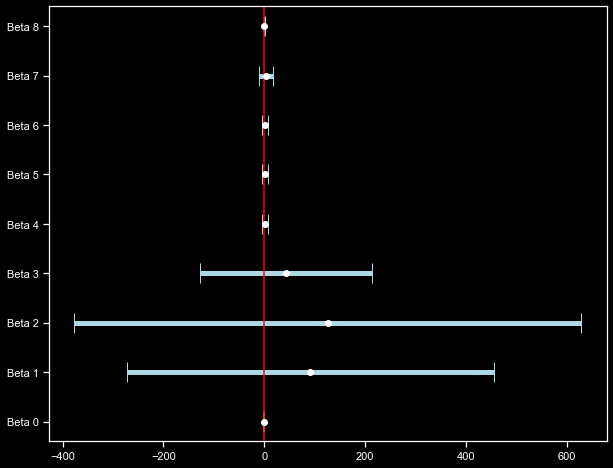

In [81]:
plt.figure(figsize=(10,8))

xerr = ICs.apply(lambda x: x.Sup - x.Inf, axis=1)

plt.errorbar(x=(ICs['Sup'] + ICs['Inf']/2), y=ICs.index, xerr=xerr,
            fmt = 'o',color = 'white', 
            ecolor = 'lightblue', elinewidth = 5, capsize=10)
plt.axvline(x=0, color='red')

In [ ]:
# Previsão

# Intervalo de Conf Previsão

# Análise de Resíduo

-----------------
# Previsão para Novos Dados

Para realizar a previsão basta voltarmos na equação: $$\hat y = X\hat\beta = (X^TX)^{-1}X^Ty$$e aplicarmos para os novos dados.

In [94]:
y_teste = teste['Chance of Admit ']
X_teste = teste.drop(columns='Chance of Admit ')

new_X = np.column_stack((np.ones(len(teste)), X_teste))

In [95]:
prev = new_X.dot(betas)

## Análise de Resíduos

In [98]:
residuo = y_teste - prev

### Análise Gráfica

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Count'>

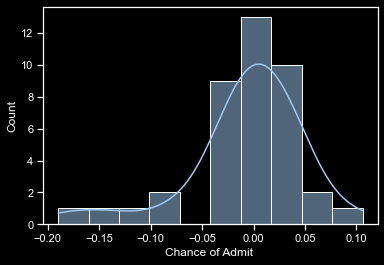

In [100]:
sns.histplot(residuo, kde=True)

Aparentemente nossos resíduos seguem uma distribuição normal, o que é de nosso interesse pois significa que a regressão se ajustou bem aos dados, mas apresenta uma cauda a esquerda o que pode ser um indicador que faltou ajuste em certos pontos.

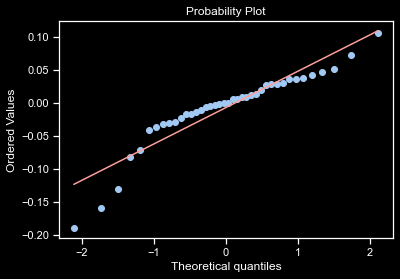

In [101]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(residuo, plot=ax, fit=True)

Aqui podemos ver que no início e no fim da reta os valores y tem valor menor do que o de x, isso significa que as previões tendem a ser a menor.
Pode ser visto no gráfico da distribuiçõa que temos uma cauda a esquerda.

c:\users\lagee\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Chance of Admit '>

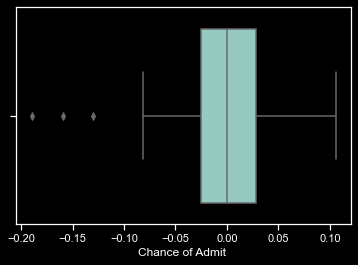

In [107]:
sns.boxplot(residuo)

Houve alguns casos de outliers.

<AxesSubplot:ylabel='Chance of Admit '>

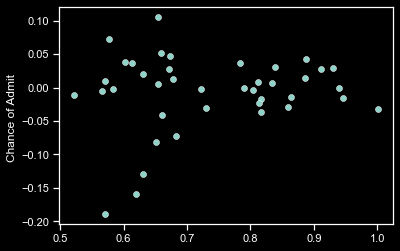

In [108]:
sns.scatterplot(x=prev, y=residuo)

E por esse gráfico aparentemente nossos resíduos não são homocedásticos.

### Testes Estatísticos

In [112]:
from scipy.stats import shapiro, kurtosis, skew

shap_stat, pvalor = shapiro(residuo)

print(f'Série {"não " if pvalor<0.05 else ""}acompanha uma distribuição Normal.')

Série não acompanha uma distribuição Normal.


In [114]:
kurtosis(residuo)

2.4242146445565265

A distribuição é mesocurtica.

In [116]:
skew(residuo)

-1.3165285689927166

Se trata também de um distribuição assimétrica negativa,  𝑦̂ < 𝑀𝑑 < 𝑀𝑜

---------------------------------
-------------------------------
-------------------------------

**The End!**